In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import imageio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Activation, GlobalAveragePooling2D, MaxPooling2D, Conv2D
from tensorflow.keras import applications as app
from tensorflow.keras import optimizers, losses, activations, models

#from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

### Data pre-processing

In [3]:
data_generator = ImageDataGenerator(rescale=1/255)

In [4]:
%%time
train_generator = data_generator.flow_from_directory(
        directory='C:/breakhis/train',
        target_size=(150, 150),
        batch_size=11,
        class_mode='categorical',
        shuffle=True)

Found 5005 images belonging to 8 classes.
Wall time: 231 ms


In [5]:
test_generator = data_generator.flow_from_directory(
        directory='C:/breakhis/test',
        target_size=(150, 150),
        batch_size=11,
        class_mode='categorical',
        shuffle=True)

Found 2904 images belonging to 8 classes.


### Build Model2 (CNN)

In [6]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))

model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(8, activation='softmax'))


In [7]:
model2.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.SGD(lr=0.0001, momentum=0.9),
              metrics=['accuracy'])

In [8]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 331776)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                21233728  
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 520       
Total params: 21,253,640
Trainable params: 21,253,640
Non-trainable params: 0
____________________________________________

In [9]:
%%time
history2 = model2.fit_generator(train_generator, steps_per_epoch=5005/11, 
                              validation_data=test_generator, validation_steps=2904/11, 
                              shuffle=True, epochs=20, verbose=True)

Epoch 1/20
455/455 [==============================] - 94s 208ms/step - loss: 1.6475 - acc: 0.4659 - val_loss: 1.7204 - val_acc: 0.4236
Epoch 2/20
455/455 [==============================] - 90s 197ms/step - loss: 1.5472 - acc: 0.4971 - val_loss: 1.6922 - val_acc: 0.4184
Epoch 3/20
455/455 [==============================] - 90s 198ms/step - loss: 1.5011 - acc: 0.5079 - val_loss: 1.6567 - val_acc: 0.4749
Epoch 4/20
455/455 [==============================] - 91s 199ms/step - loss: 1.4501 - acc: 0.5241 - val_loss: 1.6376 - val_acc: 0.4694
Epoch 5/20
455/455 [==============================] - 92s 202ms/step - loss: 1.4058 - acc: 0.5295 - val_loss: 1.6280 - val_acc: 0.4762
Epoch 6/20
455/455 [==============================] - 90s 198ms/step - loss: 1.3645 - acc: 0.5349 - val_loss: 1.6603 - val_acc: 0.4762
Epoch 7/20
455/455 [==============================] - 90s 198ms/step - loss: 1.3180 - acc: 0.5437 - val_loss: 1.6690 - val_acc: 0.4153
Epoch 8/20
455/455 [==============================] - 9

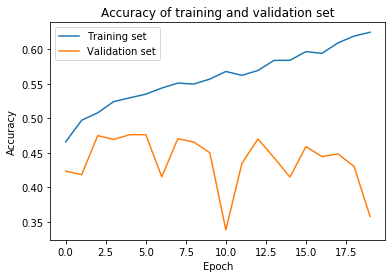

In [21]:
plt.plot(range(20), history2.history['acc'])
plt.plot(range(20), history2.history['val_acc'])
plt.title("Accuracy of training and validation set")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training set", "Validation set"])

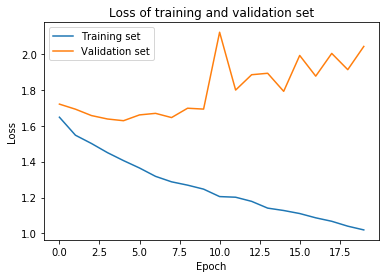

In [22]:
plt.plot(range(20), history2.history['loss'])
plt.plot(range(20), history2.history['val_loss'])
plt.title("Loss of training and validation set")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training set", "Validation set"])